In [ ]:
!pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 51.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install transformers[torch]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 17.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
from sklearn.metrics import classification_report
import pandas as pd

df_human = pd.read_csv("human.csv")
df_ai = pd.read_csv("ai.csv")
df_paraphrased = pd.read_csv("paraphrased.csv")

# Assign labels
df_human['label'] = 0
df_ai['label'] = 1
df_paraphrased['label'] = 2

# Selecting only the 'abstract' and 'label' columns
df_human = df_human[['abstract', 'label']]
df_ai = df_ai[['abstract', 'label']]
df_paraphrased = df_paraphrased[['abstract', 'label']]

# Concatenate all DataFrames into one
df = pd.concat([df_human, df_ai, df_paraphrased], ignore_index=True)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the count of each class to ensure it is balanced
print(df['label'].value_counts())

#Split the dataset into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Training Set Size: {len(train_df)}")
print(f"Test Set Size: {len(test_df)}")

#Tokenize the Data
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize the training data
train_encodings = tokenizer(train_df['abstract'].tolist(), padding=True, truncation=True, max_length=512)
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_df['label'].values
})

# Tokenize the test data
test_encodings = tokenizer(test_df['abstract'].tolist(), padding=True, truncation=True, max_length=512)
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_df['label'].values
})

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

training_args = TrainingArguments(
    output_dir='./results_roberta_1',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


label
1    15395
2    15395
0    15391
Name: count, dtype: int64
Training Set Size: 36944
Test Set Size: 9237


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.313900,0.416060
2,0.001400,0.379684
3,0.024900,0.405394


AttributeError: 'Trainer' object has no attribute 'eval'

In [ ]:
# Step 8: Evaluate the Model
# Get model predictions on the test set
predictions = trainer.predict(test_dataset)

# Get predicted labels (the predictions will be logits, so we need to take argmax to get the predicted class)
predicted_labels = predictions.predictions.argmax(axis=-1)

# Print the classification report to evaluate the model's performance
print(classification_report(test_df['label'], predicted_labels))

# Step 9: Save the Fine-Tuned Model and Tokenizer
model.save_pretrained('roberta_1_fine_tuned_model')
tokenizer.save_pretrained('roberta_1_fine_tuned_model')

print("Model and Tokenizer saved.")

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      3059
           1       0.95      1.00      0.97      3088
           2       0.87      0.94      0.90      3090

    accuracy                           0.93      9237
   macro avg       0.93      0.93      0.93      9237
weighted avg       0.93      0.93      0.93      9237

Model and Tokenizer saved.


In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer
import torch

# Load the saved model and tokenizer
model = RobertaForSequenceClassification.from_pretrained('roberta_1_fine_tuned_model')
tokenizer = RobertaTokenizer.from_pretrained('roberta_1_fine_tuned_model')

# Load model to device (GPU/CPU)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Sample sentence to predict
#sentence = "I think I am better suited for this job position as I have significant experience using AWS Lambda which is the core requireemnt for this project"
sentence = "Yes we had signed up and I had also taken a screenshot of the page with Date and Time and have attached it to this email. You can also verify from the sign up page history that we had signed up and we believe that someone has changed our time slot."
# Tokenize the input
inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
inputs = {key: value.to(device) for key, value in inputs.items()}

# Make prediction
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted label (the class with the highest logit)
predicted_class = outputs.logits.argmax(dim=-1).item()

# Map the predicted class to a label
labels = {0: 'Human-generated', 1: 'AI-generated', 2: 'Paraphrased'}
predicted_label = labels[predicted_class]

print(f"Sentence: {sentence}")
print(f"Predicted label: {predicted_label}")


OSError: roberta_1_fine_tuned_model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
# Sample sentence to predict
#sentence = "I think I am better suited for this job position as I have significant experience using AWS Lambda which is the core requireemnt for this project"
sentence = "Yes we had signed up and I had also taken a screenshot of the page with Date and Time and have attached it to this email. You can also verify from the sign up page history that we had signed up and we believe that someone has changed our time slot."
# Tokenize the input
inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Make prediction
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted label (the class with the highest logit)
predicted_class = outputs.logits.argmax(dim=-1).item()

# Map the predicted class to a label
labels = {0: 'Human-generated', 1: 'AI-generated', 2: 'Paraphrased'}
predicted_label = labels[predicted_class]

print(f"Sentence: {sentence}")
print(f"Predicted label: {predicted_label}")

Sentence: Yes we had signed up and I had also taken a screenshot of the page with Date and Time and have attached it to this email. You can also verify from the sign up page history that we had signed up and we believe that someone has changed our time slot.
Predicted label: Human-generated


In [ ]:
"sentence = "Yes, we completed the sign-up and I have attached a screenshot of the page, including the date and time, to this email. You can also check the sign-up page history for confirmation, as we believe someone may have changed our time slot."
# Tokenize the input
inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
#inputs = {key: value.to(device) for key, value in inputs.items()}

# Make prediction
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted label (the class with the highest logit)
predicted_class = outputs.logits.argmax(dim=-1).item()

# Map the predicted class to a label
labels = {0: 'Human-generated', 1: 'AI-generated', 2: 'Paraphrased'}
predicted_label = labels[predicted_class]

print(f"Sentence: {sentence}")
print(f"Predicted label: {predicted_label}")

Sentence: Yes, we completed the sign-up and I have attached a screenshot of the page, including the date and time, to this email. You can also check the sign-up page history for confirmation, as we believe someone may have changed our time slot.
Predicted label: Paraphrased


In [ ]:
sentence = "I’m driven to work on AI safety at Anthropic because I believe that ensuring the safety and alignment of advanced AI systems is one of the most critical challenges of our time. As AI technology grows more capable, so do the potential risks associated with its deployment. This brings an urgent need for thoughtful, rigorous approaches to managing and mitigating those risks—both in the design of safe models and in anticipating potential challenges of AI alignment with human values. Anthropic’s unique focus on building interpretable, reliable AI systems and promoting research transparency strongly aligns with my vision of AI safety as a long-term, multi-disciplinary endeavor that requires both technical depth and ethical responsibility."


inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=512)
#inputs = {key: value.to(device) for key, value in inputs.items()}

# Make prediction
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted label (the class with the highest logit)
predicted_class = outputs.logits.argmax(dim=-1).item()

# Map the predicted class to a label
labels = {0: 'Human-generated', 1: 'AI-generated', 2: 'Paraphrased'}
predicted_label = labels[predicted_class]

print(f"Sentence: {sentence}")
print(f"Predicted label: {predicted_label}")

Sentence: I’m driven to work on AI safety at Anthropic because I believe that ensuring the safety and alignment of advanced AI systems is one of the most critical challenges of our time. As AI technology grows more capable, so do the potential risks associated with its deployment. This brings an urgent need for thoughtful, rigorous approaches to managing and mitigating those risks—both in the design of safe models and in anticipating potential challenges of AI alignment with human values. Anthropic’s unique focus on building interpretable, reliable AI systems and promoting research transparency strongly aligns with my vision of AI safety as a long-term, multi-disciplinary endeavor that requires both technical depth and ethical responsibility.
Predicted label: AI-generated


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_df['label'], predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI', 'Paraphrased'], yticklabels=['Human', 'AI', 'Paraphrased'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Loss and Accuracy Curves
train_losses = trainer.state.log_history
train_loss = [log['loss'] for log in train_losses if 'loss' in log]
eval_loss = [log['eval_loss'] for log in train_losses if 'eval_loss' in log]
eval_accuracy = [log['eval_accuracy'] for log in train_losses if 'eval_accuracy' in log]

plt.figure(figsize=(12, 6))

# Plot Loss Curve
plt.subplot(1, 2, 1)
plt.plot(range(len(train_loss)), train_loss, label='Training Loss', color='blue')
plt.plot(range(len(eval_loss)), eval_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(range(len(eval_accuracy)), eval_accuracy, label='Validation Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Step 11: Save the Fine-Tuned Model and Tokenizer
model.save_pretrained('./fine_tuned_model_roberta_1')
tokenizer.save_pretrained('./fine_tuned_model_roberta_1')

print("Model and Tokenizer saved.")

Visuals

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#model_path = '/content/drive/MyDrive/DL_project/Electra/trained_model_electra_new_para_data'
model_path = '/content/drive/MyDrive/DL_project/Roberta/roberta_1_fine_tuned_model'


In [3]:
import os
#print(os.path.exists('/content/drive/MyDrive/DL_project/Electra/trained_model_electra_new_para_data'))  # Should print True if the folder exists
print(os.path.exists('/content/drive/MyDrive/DL_project/Roberta/roberta_1_fine_tuned_model'))  # Should print True if the folder exists


True


In [4]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Load the RoBERTa model
model = RobertaForSequenceClassification.from_pretrained(model_path)

# Load the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained(model_path)


In [5]:
pip install transformers datasets scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Load your datasets
df_human = pd.read_csv("/content/drive/MyDrive/DL_project/Roberta/human.csv")
df_ai = pd.read_csv("/content/drive/MyDrive/DL_project/Roberta/ai.csv")
df_paraphrased = pd.read_csv("/content/drive/MyDrive/DL_project/Roberta/paraphrased.csv")

# Assign labels and prepare data (same as before)
df_human['label'] = 0
df_ai['label'] = 1
df_paraphrased['label'] = 2

# Selecting only the 'abstract' and 'label' columns
df_human = df_human[['abstract', 'label']]
df_ai = df_ai[['abstract', 'label']]
df_paraphrased = df_paraphrased[['abstract', 'label']]

# Concatenate all DataFrames into one
df = pd.concat([df_human, df_ai, df_paraphrased], ignore_index=True)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the test data (use the saved tokenizer)
test_encodings = tokenizer(test_df['abstract'].tolist(), padding=True, truncation=True, max_length=512)
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_df['label'].values
})


In [8]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

# Ensure the model is on the correct device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define a collate_fn to return batches as a dictionary of tensors
def collate_fn(batch):
    return {
        'input_ids': torch.tensor([item['input_ids'] for item in batch]).to(device),
        'attention_mask': torch.tensor([item['attention_mask'] for item in batch]).to(device),
        'labels': torch.tensor([item['labels'] for item in batch]).to(device)
    }

# Create a DataLoader for batching, using collate_fn to format each batch
test_dataloader = DataLoader(test_dataset, batch_size=32, collate_fn=collate_fn)  # Increased batch size to 32

# Set the model to evaluation mode
model.eval()

# List to store predictions
predictions = []

# Perform prediction on the test set using batches
with torch.no_grad():
    for batch in test_dataloader:
        # Get inputs and move them to the correct device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        # Forward pass through the model
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # Get predicted labels by selecting the class with the highest logit
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1).cpu().numpy()

        # Append predictions to the list
        predictions.extend(preds)

# Get the true labels
true_labels = test_df['label'].values

# Print the classification report
report = classification_report(true_labels, predictions, target_names=['Human-written', 'AI-generated', 'Paraphrased'])
print(report)


               precision    recall  f1-score   support

Human-written       0.99      0.85      0.91      3059
 AI-generated       0.95      1.00      0.97      3088
  Paraphrased       0.87      0.94      0.90      3090

     accuracy                           0.93      9237
    macro avg       0.93      0.93      0.93      9237
 weighted avg       0.93      0.93      0.93      9237



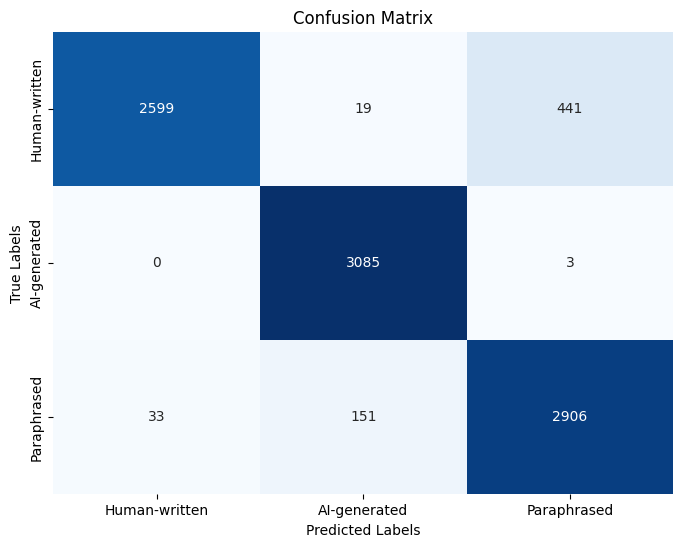

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human-written', 'AI-generated', 'Paraphrased'],
            yticklabels=['Human-written', 'AI-generated', 'Paraphrased'], cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


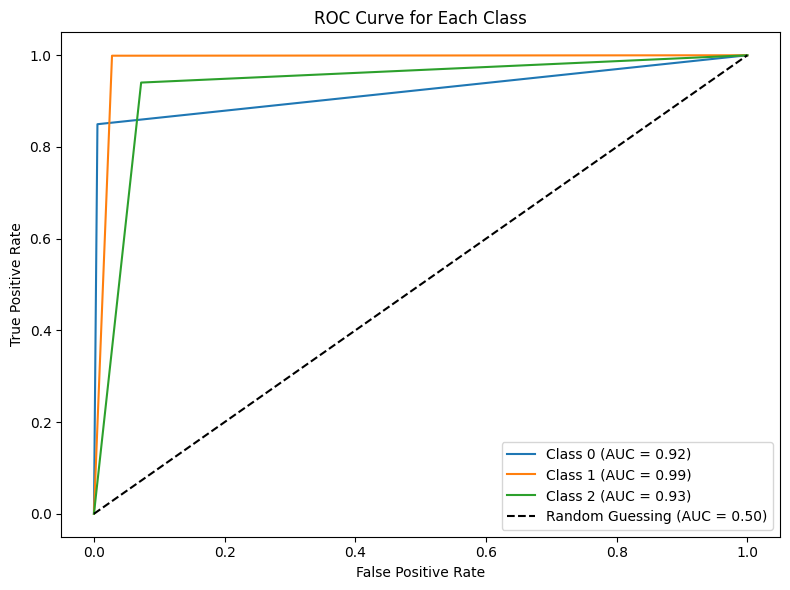

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels (one-hot encoding)
true_binary = label_binarize(true_labels, classes=[0, 1, 2])
pred_binary = label_binarize(predictions, classes=[0, 1, 2])

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(true_binary[:, i], pred_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


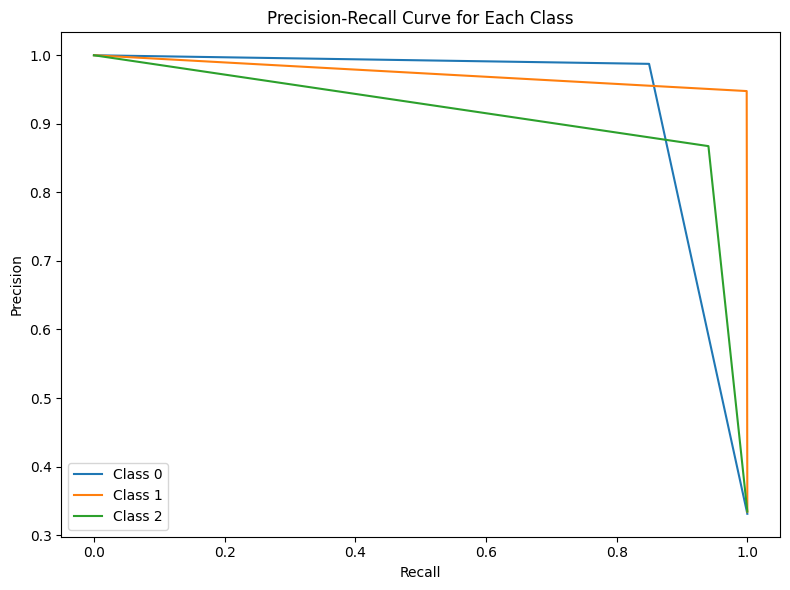

In [22]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve for each class
precision_class = {}
recall_class = {}
thresholds_class = {}

for i in range(3):
    precision_class[i], recall_class[i], thresholds_class[i] = precision_recall_curve(true_binary[:, i], pred_binary[:, i])

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(recall_class[i], precision_class[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


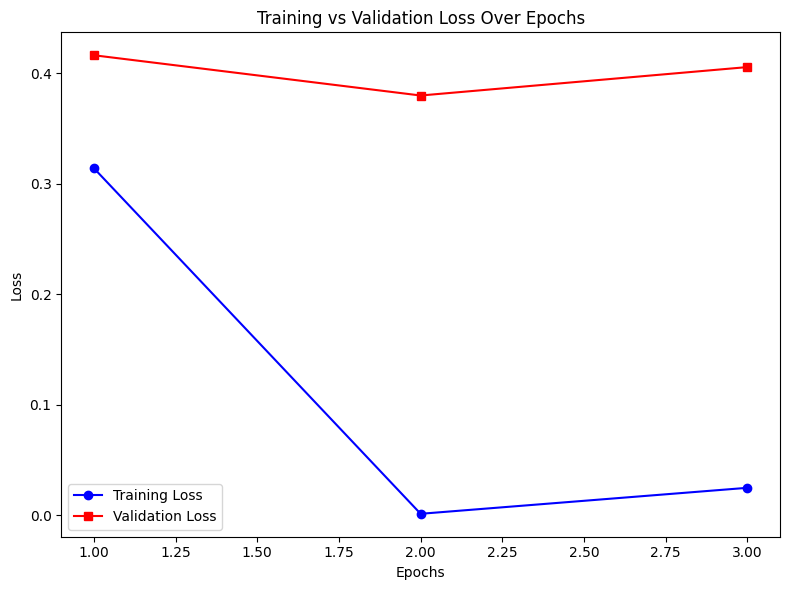

In [23]:
import matplotlib.pyplot as plt

# Example data (replace with your actual loss values)
epochs = [1, 2, 3]
train_losses = [0.3139, 0.0014, 0.0249]
val_losses = [0.4161, 0.3797, 0.4054]

# Plot the losses
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_losses, label='Training Loss', marker='o', color='b')
plt.plot(epochs, val_losses, label='Validation Loss', marker='s', color='r')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
import torch
# Sample text to analyze
text = """

Self Consistency (COT) Goal: The Self Consistency technique is used to enhance the forecast accuracy and dependability of the model. In this method, various outputs are generated for the same input, and the most consistent response among all the created answers is used to determine the final output.
Application: Several outputs are generated for each query in each model, and the most reliable answer is chosen. This method produces more trustworthy outcomes by reducing biases and inconsistencies in the model's predictions.
Direct Prompt Objective: When simple, straightforward responses are required, then direct prompting is used. In this approach, the model is given a very clear and concise instruction to which it is expected to provide a direct response without having to use complex logic or numerous steps.
Application: The models are directly prompted to instantiate responses for immediate answers when the task requires only simple fact retrieval or classification. In this way, the models can focus on generating responses with accuracy and speed where the task at hand does not require reasoning or elaborate instructions.


"""

prompts = [
    "Is this text written by a human, generated by AI, or paraphrased from an existing source? Please identify any markers or patterns that support your answer.",  # Complex prompt with focus on markers
    "What linguistic, stylistic, or structural features in this text suggest it is human-written, AI-generated, or paraphrased? Highlight specific elements like tone, coherence, or originality.",  # More in-depth feature-based analysis
    "Does this text exhibit common features of human authorship, AI generation (like GPT), or paraphrasing from another work? Consider factors like vocabulary, sentence complexity, and context repetition.",  # Deeper into patterns and features
    "What are the primary distinctions between human-written, AI-generated, and paraphrased texts? Analyze aspects such as creativity, consistency, structure, and originality. How do these features influence the classification?",  # Detailed comparative analysis
]




In [41]:
import torch

def get_prediction(prompt, text, device):
    # Tokenize input and model prediction
    inputs = tokenizer(prompt + " " + text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Perform the model prediction
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1).item()  # Convert logits to predicted class (0, 1, or 2)
    return predicted_class

# Ensure the model is on the correct device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Implement Least-to-Most prompting
for prompt in prompts:
    result = get_prediction(prompt, text, device)
    prediction_label = 'AI-generated' if result == 1 else 'Human-written' if result == 0 else 'Paraphrased'
    print(f"Prompt: {prompt}")
    print(f"Prediction: {prediction_label}")
    print("\n")


Prompt: Is this text written by a human, generated by AI, or paraphrased from an existing source? Please identify any markers or patterns that support your answer.
Prediction: Paraphrased


Prompt: What linguistic, stylistic, or structural features in this text suggest it is human-written, AI-generated, or paraphrased? Highlight specific elements like tone, coherence, or originality.
Prediction: Paraphrased


Prompt: Does this text exhibit common features of human authorship, AI generation (like GPT), or paraphrasing from another work? Consider factors like vocabulary, sentence complexity, and context repetition.
Prediction: Human-written


Prompt: What are the primary distinctions between human-written, AI-generated, and paraphrased texts? Analyze aspects such as creativity, consistency, structure, and originality. How do these features influence the classification?
Prediction: Paraphrased




**Least to Most**

In [4]:
from transformers import ElectraForSequenceClassification, ElectraTokenizer

model = ElectraForSequenceClassification.from_pretrained(model_path)

# Load the ELECTRA tokenizer
tokenizer = ElectraTokenizer.from_pretrained(model_path)


In [30]:
import torch
# Sample text to analyze
text = """
Reliable data is the most important aspect for this project. Around 83,100 raw datasets are collected and web-scraped, containing human-written, polished, and AI-generated texts as shown in Figure 3a. Data Science questions and answers are web scraped from reliable sources like GeeksforGeeks and simplilearn and the answers are labeled as human written text. The web scraped questions are then provided to ChatGPT4 and the answers generated by the AI are classified into AI-generated text. Further to get polished text, tools like Grammarly, Quillbot are used and outputs generated from these tools are labeled as paraphrased text. Web Scraped data collected in raw form is shown in Figure 3b. Raw unprocessed data is shown in Figure 3c.

"""

prompts = [
    "Is this text written by a human, generated by AI, or paraphrased from an existing source? Please identify any markers or patterns that support your answer.",  # Complex prompt with focus on markers
    "What linguistic, stylistic, or structural features in this text suggest it is human-written, AI-generated, or paraphrased? Highlight specific elements like tone, coherence, or originality.",  # More in-depth feature-based analysis
    "Does this text exhibit common features of human authorship, AI generation (like GPT), or paraphrasing from another work? Consider factors like vocabulary, sentence complexity, and context repetition.",  # Deeper into patterns and features
    "What are the primary distinctions between human-written, AI-generated, and paraphrased texts? Analyze aspects such as creativity, consistency, structure, and originality. How do these features influence the classification?",  # Detailed comparative analysis
]




In [ ]:
def get_prediction(prompt, text):
    # Tokenize input and model prediction
    inputs = tokenizer(prompt + " " + text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1).item()  # Convert logits to predicted class (0, 1, or 2)
    return predicted_class

# Implement Least-to-Most prompting
for prompt in prompts:
    result = get_prediction(prompt, text)
    prediction_label = 'AI-generated' if result == 1 else 'Human-written' if result == 0 else 'Paraphrased'
    print(f"Prompt: {prompt}")
    print(f"Prediction: {prediction_label}")
    print("\n")


Prompt: Is this text written by a human, generated by AI, or paraphrased from an existing source? Please identify any markers or patterns that support your answer.
Prediction: Human-written


Prompt: What linguistic, stylistic, or structural features in this text suggest it is human-written, AI-generated, or paraphrased? Highlight specific elements like tone, coherence, or originality.
Prediction: Human-written


Prompt: Does this text exhibit common features of human authorship, AI generation (like GPT), or paraphrasing from another work? Consider factors like vocabulary, sentence complexity, and context repetition.
Prediction: Human-written


Prompt: What are the primary distinctions between human-written, AI-generated, and paraphrased texts? Analyze aspects such as creativity, consistency, structure, and originality. How do these features influence the classification?
Prediction: Human-written




In [ ]:
def get_prediction_with_logits(prompt, text):
    # Tokenize input and model prediction
    inputs = tokenizer(prompt + " " + text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    print(f"Logits: {logits}")
    predicted_class = torch.argmax(logits, dim=-1).item()  # Convert logits to predicted class (0, 1, or 2)
    return predicted_class, logits

# Implement Least-to-Most prompting
for prompt in prompts:
    result, logits = get_prediction_with_logits(prompt, text)
    prediction_label = 'AI-generated' if result == 1 else 'Human-written' if result == 0 else 'Paraphrased'
    print(f"Prompt: {prompt}")
    print(f"Logits: {logits}")
    print(f"Prediction: {prediction_label}")
    print("\n")


Logits: tensor([[ 5.5168, -6.1764, -0.6076]])
Prompt: Is this text human-written, AI-generated, or paraphrased from another source?
Logits: tensor([[ 5.5168, -6.1764, -0.6076]])
Prediction: Human-written


Logits: tensor([[ 5.8505, -5.8872, -1.2013]])
Prompt: What makes this text appear human-written, AI-generated, or paraphrased from another source?
Logits: tensor([[ 5.8505, -5.8872, -1.2013]])
Prediction: Human-written


Logits: tensor([[ 5.0901, -6.3583,  0.0117]])
Prompt: Does this text resemble typical patterns of human-written content, AI-generated content, or paraphrased text?
Logits: tensor([[ 5.0901, -6.3583,  0.0117]])
Prediction: Human-written


Logits: tensor([[ 5.7321, -6.0023, -0.9735]])
Prompt: What are the key differences between human-written text, AI-generated text, and paraphrased content?
Logits: tensor([[ 5.7321, -6.0023, -0.9735]])
Prediction: Human-written




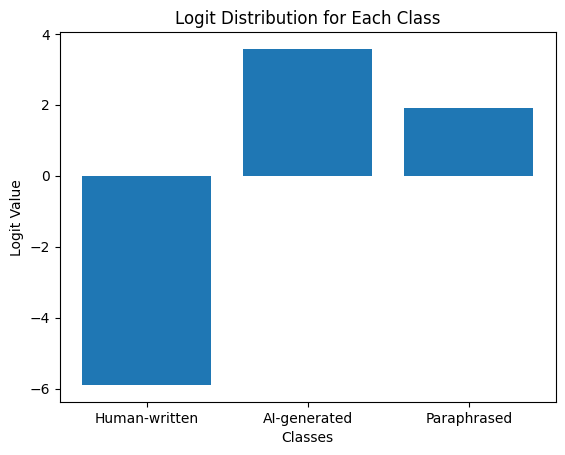

In [ ]:
import matplotlib.pyplot as plt

def plot_logits(logits):
    labels = ['Human-written', 'AI-generated', 'Paraphrased']
    logits = logits.squeeze().cpu().numpy()
    plt.bar(labels, logits)
    plt.title('Logit Distribution for Each Class')
    plt.xlabel('Classes')
    plt.ylabel('Logit Value')
    plt.show()


# Example to visualize logits for a single prediction
logits = torch.tensor([[-5.8984,  3.5749,  1.9181]])  # Example logits
plot_logits(logits)


In [ ]:
def get_prediction_with_threshold(logits, threshold=0.5):
    # Softmax to convert logits to probabilities
    probs = torch.softmax(logits, dim=-1)
    max_prob, predicted_class = torch.max(probs, dim=-1)

    # Apply thresholding: if the highest probability is below a threshold, mark as "uncertain" (paraphrased)
    if max_prob < threshold:
        return 2  # Paraphrased (uncertain prediction)
    return predicted_class.item()

# Test with logits
for prompt in prompts:
    result, logits = get_prediction_with_logits(prompt, text)
    prediction_label = 'AI-generated' if result == 1 else 'Human-written' if result == 0 else 'Paraphrased'
    print(f"Prompt: {prompt}")
    print(f"Logits: {logits}")
    print(f"Prediction: {prediction_label}")
    print("\n")


Logits: tensor([[-5.9018,  3.0470,  2.4156]])
Prompt: Is this text written by a human, generated by AI, or paraphrased from an existing source? Please identify any markers or patterns that support your answer.
Logits: tensor([[-5.9018,  3.0470,  2.4156]])
Prediction: AI-generated


Logits: tensor([[-5.8106,  3.8065,  1.6276]])
Prompt: What linguistic, stylistic, or structural features in this text suggest it is human-written, AI-generated, or paraphrased? Highlight specific elements like tone, coherence, or originality.
Logits: tensor([[-5.8106,  3.8065,  1.6276]])
Prediction: AI-generated


Logits: tensor([[-5.8953,  2.9185,  2.5079]])
Prompt: Does this text exhibit common features of human authorship, AI generation (like GPT), or paraphrasing from another work? Consider factors like vocabulary, sentence complexity, and context repetition.
Logits: tensor([[-5.8953,  2.9185,  2.5079]])
Prediction: AI-generated


Logits: tensor([[-5.8984,  3.5749,  1.9181]])
Prompt: What are the primary

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer
import torch

# Example Few-Shot Chain-of-Thought (CoT) Prompt
few_shot_examples = """
Example 1:
Text: "I went to the store to buy some groceries."
Reasoning: This text is human-written because it contains natural conversational flow and personal context.

Example 2:
Text: "The process of purchasing food items from a store is commonly referred to as shopping."
Reasoning: This text is AI-generated because it is overly formal and lacks personal experience or a conversational tone.

Example 3:
Text: "I am working on a project to improve machine learning techniques."
Reasoning: This text is human-written because it reflects a personal, direct expression of intention and action.

Now, classify the following text and provide reasoning:

Text: "I love cat "
Reasoning:
"""

# Tokenize the input (few-shot example + new input for classification)
input_text = few_shot_examples + "Text: 'The cat sat on the mat.' Reasoning: "
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=-1).item()  # Get the predicted class (0 for human, 1 for AI)

# Display the result and reasoning
reasoning_output = input_text.split("Reasoning:")[-1].strip()  # Extract the reasoning part after the last "Reasoning:"
prediction = "AI-generated" if predicted_class == 1 else "Human-written"

print(f"Prediction: {prediction}")
print(f"Reasoning: {reasoning_output}")


Prediction: Human-written
Reasoning: 
